<a href="https://colab.research.google.com/github/nuvita97/Pokemon-Battle-Prediction/blob/main/Pokemon_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nuvita97/Pokemon-Battle-Prediction

import os
path = 'Pokemon-Battle-Prediction'
os.chdir(path)
os.listdir()

Cloning into 'Pokemon-Battle-Prediction'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


['.git', 'poke_type_chart.csv', 'combats.csv', 'README.md', 'pokemon.csv']

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image
import warnings 
warnings.filterwarnings("ignore")

In [3]:
pokemon = pd.read_csv("pokemon.csv")
combat = pd.read_csv("combats.csv")

print(pokemon.shape)
print(combat.shape)

display(pokemon.head())
display(combat.head())

(800, 12)
(50000, 3)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [4]:
# Summary missing values
display(pokemon.isnull().sum())
display(combat.isnull().sum())

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [5]:
# Find missing-name pokemon
display(pokemon[pokemon['Name'].isnull()])

idx = pokemon[pokemon['Name'].isnull()].index[0]
print(idx)

display(pokemon.loc[idx-1 : idx+1])

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


62


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False


In [6]:
# Replace name for missing-name pokemon
pokemon.loc[62, 'Name'] = 'Primeape'

display(pokemon.loc[idx-1 : idx+1])

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False


In [7]:
# Create new table for statistics
WinsDF = pd.DataFrame(columns = ["Index", "Total_Fights", "Total_Wins", "Win_Percent"])

# Total_Fights
CountFirstCols = combat["First_pokemon"].value_counts().sort_index()
CountSecondCols = combat.groupby("Second_pokemon")["Second_pokemon"].count()
TotalFights = CountFirstCols + CountSecondCols
WinsDF["Index"] = TotalFights.index
WinsDF["Total_Fights"] = TotalFights.values
WinsDF.head()

,Index,Total_Fights,Total_Wins,Win_Percent
0,1,133,NaN,NaN
1,2,121,NaN,NaN
2,3,132,NaN,NaN
3,4,125,NaN,NaN
4,5,112,NaN,NaN


In [8]:
# Total_Wins & Win_Percent
WinnerCols = combat["Winner"].value_counts().sort_index()
WinsDF["Total_Wins"] = WinsDF["Index"].apply(lambda idx : WinnerCols[idx] if idx in WinnerCols.index else 0)
WinsDF["Win_Percent"] = WinsDF["Total_Wins"] / WinsDF["Total_Fights"]
WinsDF.head()

,Index,Total_Fights,Total_Wins,Win_Percent
0,1,133,37,0.278195
1,2,121,46,0.380165
2,3,132,89,0.674242
3,4,125,70,0.560000
4,5,112,55,0.491071


In [9]:
# Combine WinsDF with Pokemon into 1 table for prediction
data = pd.merge(pokemon, WinsDF, left_on = "#", right_on = "Index")
print(data.shape)
display(data.head())

(784, 16)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Index,Total_Fights,Total_Wins,Win_Percent
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1,133,37,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2,121,46,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3,132,89,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4,125,70,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5,112,55,0.491071


In [10]:
# Remove unnecessary cols: Total_Fights, Total_Wins, Name, Type 1, Type 2, Index
drop_cols = ["Total_Fights", "Total_Wins", "Name", "Type 1", "Type 2", "Index"]
data = data.drop(drop_cols, axis = 1)
display(data.head())
print(data.shape)

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win_Percent
0,1,45,49,49,65,65,45,1,False,0.278195
1,2,60,62,63,80,80,60,1,False,0.380165
2,3,80,82,83,100,100,80,1,False,0.674242
3,4,80,100,123,122,120,80,1,False,0.560000
4,5,39,52,43,60,50,65,1,False,0.491071


(784, 10)


In [13]:
# Find Correlation between features with Win_Percent => Remove small correlation, and increase low correlation
correlations = data.corr()
display(correlations.style.background_gradient(cmap = 'coolwarm'))
display(correlations["Win_Percent"].sort_values(ascending = False))

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win_Percent
#,1.000000,0.103511,0.105296,0.095125,0.089596,0.081203,0.009309,0.983282,0.154566,0.061200
HP,0.103511,1.000000,0.420464,0.248069,0.366261,0.385570,0.183813,0.062361,0.280315,0.261602
Attack,0.105296,0.420464,1.000000,0.442344,0.398339,0.265884,0.385933,0.052824,0.348178,0.502825
Defense,0.095125,0.248069,0.442344,1.000000,0.221042,0.508399,0.011475,0.042117,0.242051,0.114565
Sp. Atk,0.089596,0.366261,0.398339,0.221042,1.000000,0.503077,0.473344,0.036614,0.447989,0.481445
Sp. Def,0.081203,0.385570,0.265884,0.508399,0.503077,1.000000,0.254372,0.023787,0.357186,0.302422
Speed,0.009309,0.183813,0.385933,0.011475,0.473344,0.254372,1.000000,-0.026175,0.323255,0.938055
Generation,0.983282,0.062361,0.052824,0.042117,0.036614,0.023787,-0.026175,1.000000,0.079847,0.022987
Legendary,0.154566,0.280315,0.348178,0.242051,0.447989,0.357186,0.323255,0.079847,1.000000,0.324935
Win_Percent,0.061200,0.261602,0.502825,0.114565,0.481445,0.302422,0.938055,0.022987,0.324935,1.000000


Win_Percent    1.000000
Speed          0.938055
Attack         0.502825
Sp. Atk        0.481445
Legendary      0.324935
Sp. Def        0.302422
HP             0.261602
Defense        0.114565
#              0.061200
Generation     0.022987
Name: Win_Percent, dtype: float64

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Win_Percent
0,45,49,49,65,65,45,False,0.278195
1,60,62,63,80,80,60,False,0.380165
2,80,82,83,100,100,80,False,0.674242
3,80,100,123,122,120,80,False,0.560000
4,39,52,43,60,50,65,False,0.491071


5 230


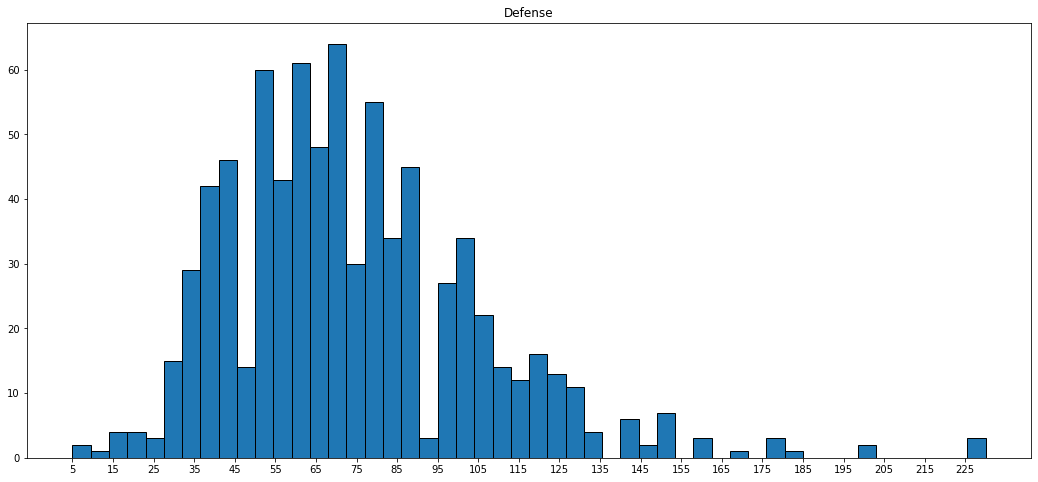

In [14]:
# Remove cols: # & Generation
drop_cols = ["#", "Generation"]
data = data.drop(drop_cols, axis = 1)
display(data.head())

# Increase Defense corr
feature = "Defense"
arr = np.array(data[feature])
print(np.min(arr), np.max(arr))

plt.figure(figsize = (18, 8))
plt.title(feature)
hist = plt.hist(arr, bins = 50, ec = "black")
plt.xticks(np.arange(min(arr), max(arr), 10.0))
plt.show()

In [15]:
# Divide into bins with mean for each bin
feature = "Defense"
data_defense = data[[feature, "Win_Percent"]].copy()
arr = np.array(data_defense[feature])

for bins in range(3, 10):
  bin_name = feature + "_" + str(bins) 
  data_defense[bin_name] = pd.qcut(arr, q = bins).astype(np.object)
  bin_meanbygroup = feature + "_" + str(bins) + "_avg"                  # Defense_3_avg for case bins = 3
  MeanDict = data_defense.groupby([bin_name])[feature].mean()           # Group by bin_name and calculate mean on Defense 
  data_defense[bin_meanbygroup] = data_defense[bin_name].map(MeanDict)  # Assign mean be bin_name

display(data_defense.head())

,Defense,Win_Percent,Defense_3,Defense_3_avg,Defense_4,Defense_4_avg,Defense_5,Defense_5_avg,Defense_6,Defense_6_avg,Defense_7,Defense_7_avg,Defense_8,Defense_8_avg,Defense_9,Defense_9_avg
0,49,0.278195,"(4.999, 58.0]",43.646388,"(4.999, 50.0]",40.712919,"(48.0, 62.0]",55.169811,"(45.0, 58.0]",52.068376,"(44.0, 55.0]",50.036496,"(40.0, 50.0]",47.330275,"(40.0, 50.0]",47.330275
1,63,0.380165,"(58.0, 83.0]",69.690840,"(50.0, 70.0]",62.593607,"(62.0, 77.0]",69.483871,"(58.0, 70.0]",65.078788,"(55.0, 65.0]",61.783784,"(60.0, 70.0]",67.050420,"(58.0, 65.0]",62.260000
2,83,0.674242,"(58.0, 83.0]",69.690840,"(70.0, 90.0]",81.924419,"(77.0, 95.0]",86.256410,"(70.0, 83.0]",77.536082,"(75.0, 87.286]",81.428571,"(80.0, 90.0]",87.354430,"(72.0, 83.0]",78.056180
3,123,0.560000,"(83.0, 230.0]",108.876448,"(90.0, 230.0]",117.548913,"(95.0, 230.0]",121.653846,"(100.0, 230.0]",127.721311,"(105.0, 230.0]",131.447619,"(108.125, 230.0]",133.193878,"(110.0, 230.0]",136.441860
4,43,0.491071,"(4.999, 58.0]",43.646388,"(4.999, 50.0]",40.712919,"(4.999, 48.0]",37.727848,"(4.999, 45.0]",36.897260,"(4.999, 44.0]",34.713043,"(40.0, 50.0]",47.330275,"(40.0, 50.0]",47.330275


In [16]:
# Calculate corr for each case
correlations = data_defense.corr()
display(correlations)
display(correlations["Win_Percent"].sort_values(ascending = False))

,Defense,Win_Percent,Defense_3_avg,Defense_4_avg,Defense_5_avg,Defense_6_avg,Defense_7_avg,Defense_8_avg,Defense_9_avg
Defense,1.000000,0.114565,0.854438,0.897150,0.915261,0.931746,0.941671,0.946991,0.952492
Win_Percent,0.114565,1.000000,0.168016,0.166138,0.160581,0.143545,0.160437,0.145777,0.143203
Defense_3_avg,0.854438,0.168016,1.000000,0.906043,0.899759,0.917029,0.897204,0.895939,0.897055
Defense_4_avg,0.897150,0.166138,0.906043,1.000000,0.950742,0.938833,0.929808,0.947369,0.933596
Defense_5_avg,0.915261,0.160581,0.899759,0.950742,1.000000,0.957807,0.948064,0.951705,0.952674
Defense_6_avg,0.931746,0.143545,0.917029,0.938833,0.957807,1.000000,0.972473,0.970893,0.968417
Defense_7_avg,0.941671,0.160437,0.897204,0.929808,0.948064,0.972473,1.000000,0.982324,0.976941
Defense_8_avg,0.946991,0.145777,0.895939,0.947369,0.951705,0.970893,0.982324,1.000000,0.985945
Defense_9_avg,0.952492,0.143203,0.897055,0.933596,0.952674,0.968417,0.976941,0.985945,1.000000


Win_Percent      1.000000
Defense_3_avg    0.168016
Defense_4_avg    0.166138
Defense_5_avg    0.160581
Defense_7_avg    0.160437
Defense_8_avg    0.145777
Defense_6_avg    0.143545
Defense_9_avg    0.143203
Defense          0.114565
Name: Win_Percent, dtype: float64

In [18]:
# Choose the best: Defense_3_avg -> add to df
data["Defense_Imp"] = data_defense["Defense_3_avg"]
data.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Win_Percent,Defense_Imp
0,45,49,49,65,65,45,False,0.278195,43.646388
1,60,62,63,80,80,60,False,0.380165,69.690840
2,80,82,83,100,100,80,False,0.674242,69.690840
3,80,100,123,122,120,80,False,0.560000,108.876448
4,39,52,43,60,50,65,False,0.491071,43.646388


In [19]:
trainCols = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Legendary", "Defense_Imp"]
target = "Win_Percent"

X = data[trainCols].values
y = data[target].values
print(X.shape, y.shape)

# Divide into Train & Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
print(X_train.shape)
print(X_test.shape)

(784, 8) (784,)
(627, 8)
(157, 8)


In [23]:
# Use Linear Regression to predict Win_Percent
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Result
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.8809229419591809
MAE: 0.05525042005265842


In [25]:
# Use Decision Tree to predict Win_Percent
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state = 0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Result
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.8902777106650629
MAE: 0.05980366506133807


In [26]:
# Use Random Forest to predict Win_Percent
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Result
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.9266275290681266
MAE: 0.04637352362816492


In [27]:
# Use XGBoost to predict Win_Percent
import xgboost
reg = xgboost.XGBRegressor(n_estimators = 100, random_state = 0, learning_rate = 0.08, gamma = 0, subsample=0.75, colsample_bytree=1, max_depth=7)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Result
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

[11:08:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score: 0.9298051394920199
MAE: 0.045767231046498054
